In [18]:
# 1. Find all the words that are not in both the strings
def mismatched_words(string1, string2):
    
    result = []
    words1 = set(string1.lower().split())
    words2 = set(string2.lower().split())
    
    for words in words2:
        if words not in words1:
            result.append(words)
    
    for words in words1:
        if words not in words2:
            result.append(words)
            
    return result

In [20]:
# Test case 
string1 = "I want to eat fish today with my friends"
string2 = "All I want is to eat fish today with my friends"
mismatched_words(string1, string2)

['all', 'is']

In [41]:
# 2. Creating splits of data without using pandas
def read_split_from_str(list_of_dict_string):
    import json 
    
    list_strings = list_of_dict_string.replace("'","\"")
    data = json.loads(list_strings)
    splits = int(0.7 * len(data))
    
    train = data[0:splits]
    test = data[splits:]
    
    return ([train,test])

In [42]:
# Test case 
list_of_dict_string = "[{'x': 0.0, 'y': 5.43}, {'x': 50.0, 'y': 102.78}, {'x': 100.0, 'y': 204.24}]"
read_split_from_str(list_of_dict_string)

[[{'x': 0.0, 'y': 5.43}, {'x': 50.0, 'y': 102.78}],
 [{'x': 100.0, 'y': 204.24}]]

In [11]:
# 3. Function to get top n words in the paragraph w.r.t their frequencies
def n_frequent_words(posting,N):
    
    punctuations = [',' , '.', '\n']
    
    for term in posting:
        if term in punctuations:
            posting = posting.replace(term," ")
    
    posting = posting.lower().split()
    
    words_dict = {}
    
    for term in posting:
        if term in words_dict:
            words_dict[term] += 1
        else:
            words_dict[term] = 1
    
    result = sorted(words_dict.items(), key = lambda x:x[1], reverse = True)[:N]
    return result

In [12]:
posting = """
Herbal sauna uses the healing properties of herbs in combination with distilled water.   
The water evaporates and distributes the effect of the herbs throughout the room.   
A visit to the herbal sauna can cause real miracles, especially for colds. 
""" 
N = 3
n_frequent_words(posting,N)

[('the', 6), ('herbal', 2), ('sauna', 2)]

In [56]:
# 4. Compute deviation wrt each list
def compute_deviation(list_numbers):
    result = {}
    var = 0

    for item in list_numbers:
        extracted = item['values']
        mean = sum(extracted) / len(extracted)

        for nums in extracted:
            std = (sum([(v-mean)**2 for v in extracted])/len(extracted)) ** (1/2)
        result[item['key']] = std
    return(result)

In [58]:
# Test case 
list_numbers = [
    {
        'key': 'list1',
        'values': [4,5,2,3,4,5,2,3],
    },
    {
        'key': 'list2',
        'values': [1,1,34,12,40,3,9,7],
    }
]
compute_deviation(list_numbers)

{'list1': 1.118033988749895, 'list2': 14.185710239533304}

In [72]:
# 5. Find total percentage of companies in a department
def find_percentages(num_employees):
    import numpy as np
    total = []
    for company in num_employees:
        new_array = []
        total_employees = sum(company) 
        for department in company:
            new_array.append(department / total_employees)
        total.append(new_array)
    
    return(np.array(total))

In [73]:
import numpy as np
num_employees = np.array( [[10, 20, 30, 30, 10], [15, 15, 5, 10, 5], [150, 50, 100, 150, 50], [300, 200, 300, 100, 100], [1, 5, 1, 1, 2]] )
find_percentages(num_employees)

array([[0.1, 0.2, 0.3, 0.3, 0.1],
       [0.3, 0.3, 0.1, 0.2, 0.1],
       [0.3, 0.1, 0.2, 0.3, 0.1],
       [0.3, 0.2, 0.3, 0.1, 0.1],
       [0.1, 0.5, 0.1, 0.1, 0.2]])

In [106]:
# 6. Find the max profit earned on dates 
def max_profit(stock_prices, dts):
    min_value = min(stock_prices)
    max_value = max(stock_prices)
    
    diff = max_value - min_value
    min_val_idx = stock_prices.index(min_value)
    max_val_idx = stock_prices.index(max_value)
    
    return(diff, dts[min_val_idx], dts[max_val_idx])

In [107]:
# Test case 
stock_prices = [10,5,20,32,25,12]
dts = [
    '2019-01-01', 
    '2019-01-02',
    '2019-01-03',
    '2019-01-04',
    '2019-01-05',
    '2019-01-06',
]

max_profit(stock_prices, dts)

(27, '2019-01-02', '2019-01-04')

In [126]:
# 7. Find the total sum for the adjacent integers
def int_str_addition(int_str):
    total_sum = 0 
    
    for i in range(len(int_str)):
        for j in range(i+1, len(int_str) + 1):
            total_sum += int(int_str[i:j])
    
    return total_sum

In [128]:
# Test case 
int_str = '12'
int_str_addition(int_str)

15

In [21]:
# 8. Normalize the data in 0 and 1
def normalize_grades(tuples):
    
    min_value = min(x[1] for x in tuples)
    max_value = max(x[1] for x in tuples)
    diff = max_value - min_value
    
    return [(x[0],(x[1] - min_value)/ (diff)) for x in tuples]

In [22]:
# Test case 
tuples = [
    ('Jason', 94),
    ('Tessa', 80),
    ('Carla', 38),
    ('Matt', 43),
    ('Jessica', 100)
]

normalize_grades(tuples)

[('Jason', 0.9032258064516129),
 ('Tessa', 0.6774193548387096),
 ('Carla', 0.0),
 ('Matt', 0.08064516129032258),
 ('Jessica', 1.0)]

In [27]:
# 9. Find subsequence in the string
def is_subsequence(string1,string2):
    
    queue = []
    
    for char in string1:
        queue.append(char)
    
    for char in string2:
        if char == queue[0]:
            queue.pop(0)
    
    if len(queue) == 0:
        return True
    else:
        return False

In [28]:
# test case
string1 = 'abc'
string2 = 'asbsc'
string3 = 'acedb'

is_subsequence(string1,string2)

True

In [58]:
# 10. If the root is available in words
def replace_words(roots, sentence):
    
    split_sentence = sentence.split()
    
    for word in split_sentence:
        for root in roots:
            if root in word:
                if word.lower().startswith(root):
                    split_sentence[split_sentence.index(word)] = root
                else:
                    continue
    
    output = " ".join(split_sentence)
    return output

In [59]:
# test case
roots = ["cat", "bat", "rat"]
sentence = "the cattle was rattled by the battery"
replace_words(roots, sentence)

'the cat was rat by the bat'

In [60]:
# Test case 
roots = ['accurate','possible','play']
sentence = "The result of the match was inaccurate, adding every single point it's impossible that it adds to the total result in playing the match "
replace_words(roots, sentence)

"The result of the match was inaccurate, adding every single point it's impossible that it adds to the total result in play the match"

In [98]:
# 11. Find the common bought items and return as the output as below
def common_items(pair_list):
    
    item_dict = {}
    
    for pairs in pair_list:
        if pairs[0] not in item_dict:
            item_dict[pairs[0]] = [pairs[1]]
        else:
            item_dict[pairs[0]].append(pairs[1])
    
    keys = sorted(item_dict)
    
    tuple_list = []
    
    for i, k1 in enumerate(keys):
        for k2 in keys[i+1: ]:
            tuple_list.append((k1, k2, len(set(item_dict[k1]) & set(item_dict[k2]))))
    
    return tuple_list

In [99]:
# Test case 
pair_list = [('Susan', 'spoon'), ('Susan', 'fork'), ('Mark', 'fork'), ('Mark', 'spoon'), ('Mark', 'plate'), ('Lily', 'plate')]
common_items(pair_list)

[('Lily', 'Mark', 1), ('Lily', 'Susan', 0), ('Mark', 'Susan', 2)]

In [103]:
# 12. Returning a list grouped by week 
from datetime import datetime   
from collections import defaultdict
def weekly_aggregation(ts):
    result = defaultdict(list)
    for t1 in ts:
        t1_date = datetime.strptime(t1,"%Y-%m-%d")
        week = t1_date.isocalendar()[1]
        result[week].append(t1)
    return list(result.values())


In [105]:
# Test case 
ts = [
    '2019-01-01', 
    '2019-01-02',
    '2019-01-08', 
    '2019-02-01', 
    '2019-02-02',
    '2019-02-05',
]

weekly_aggregation(ts)

[['2019-01-01', '2019-01-02'],
 ['2019-01-08'],
 ['2019-02-01', '2019-02-02'],
 ['2019-02-05']]

In [109]:
# 13. Convert cdf from pdf : cumulative distribution function from probability distribuition function
def to_cdf(pdf):
    cdf = []
    sum = 0 
    for i in range(len(pdf)):
        sum += pdf[i]
        cdf.append(round(sum,3))
    return pdf

In [111]:
# Test case
pdf = [1.2,3.4,5.3]
to_cdf(pdf)

[1.2, 3.4, 5.3]

In [4]:
# 14. Get the last page of the string
def get_last_page(int_string):
    
    i = 0 
    while len(int_string) > 0:
        i += 1
        if i == int(int_string[: len(str(i))]):
            int_string = int_string[len(str(i)):]
        else:
            return(i - 1)
    return i

In [5]:
input = '12345678910111213'
get_last_page(input)

13

array([-1.77577732,  0.76317051, -1.40123882, ...,  0.84911609,
       -0.09385915,  1.47011913])

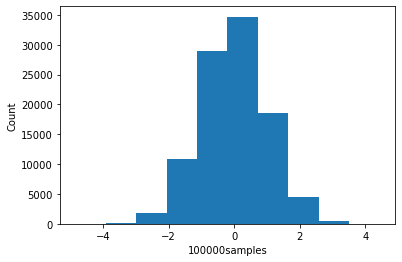

In [9]:
# 15. Generate normal distribution
import scipy.stats
import numpy as np
import random
import matplotlib.pyplot as plt

def samples_from_norm(N):
    dist = scipy.stats.norm(0,1)
    samples = dist.rvs(N)
    plt.hist(samples)
    plt.xlabel(str(N) + 'samples')
    plt.ylabel('Count')
    plt.show
    
    return samples

samples_from_norm(100000)

In [72]:
# 16. Flatten a json file

def flatten_json(json_str):
    
    import json
    inputs = json.loads(json_str)
    
    output_dict = {}
    
    for main in inputs:
        for sub in inputs[main]:
            output_dict[str(main+'_'+sub)] = inputs[main][sub]
    return output_dict

In [73]:
# Test case 
import json
json_str = json.dumps({'a':{'b':'c', 'd':'e'}})
flatten_json(json_str)

{'a_b': 'c', 'a_d': 'e'}

In [82]:
# 17. Prime numbers
def prime_numbers(N):
    num_list = []
    for num in range(2, N):
        if num != 2 and num % 2 == 0:
            continue 
        if all(num%i!=0 for i in range(2, int(pow(num, 0.5)+1))):
            num_list.append(num)
    return num_list

In [83]:
prime_numbers(100)

[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97]

In [88]:
# 18. Tag finder
import re
def tag_counter(tag_groups,text):
    #remove any punctuations
    text_nopun=re.sub(r'[^\w\s]','',text)

    #entire text converted to lower case 
    text_splt= [word.lower() for word in text_nopun.split()]
    
    text_mod=" ".join(text_splt)
 
    out=[]
    for i in range(len(tag_groups)):
        sub_group=tag_groups[i]
        c=0
        for j in range(len(sub_group)):
            pattern=tag_groups[i][j]
            
            for match in re.finditer(pattern.lower(), text_mod):
                s = match.start()
                e = match.end()
                c=c+1
                #print(text_mod[s:e])
        #print(" For {} count is {}".format(sub_group,c))
        out.append(c)
    return(out)

In [89]:
# test case
tag_groups = [
    ['data scientist', 'data analyst'], 
    ['data engineer', 'data wrangler'], 
    ['machine learning engineer'], 
    ['data' , 'engineer']]
text = "Today, with the advent of data science, different roles have emerged in the industry. Job postings are abundant of many names such as data scientist, data engineer, data wrangler, deep learning specialist, and machine learning specialist to name a few."

tag_counter(tag_groups,text)

[1, 2, 0, 5]